In [9]:
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid") # will show grids on the plot, with a transparent background color
# sns.set(style="ticks") # Will only show ticks on the axis, without grids

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


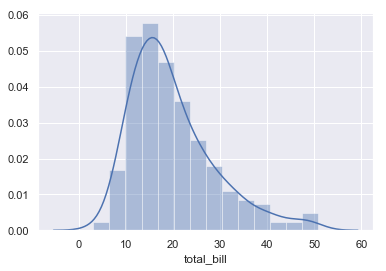

In [7]:
sns.distplot(tips['total_bill']) # Distribution plot of a uni-variate set of obs - takes one column of a dataframe

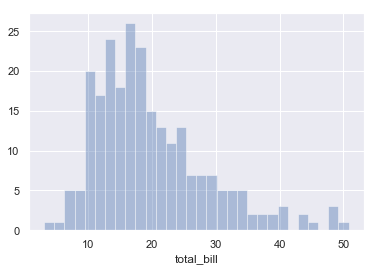

In [22]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # kde=False removes the Kernel Density Estimation curve from the plot

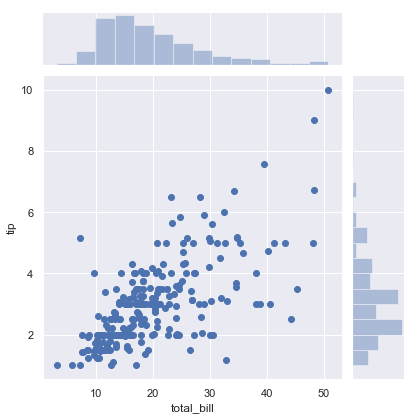

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips)

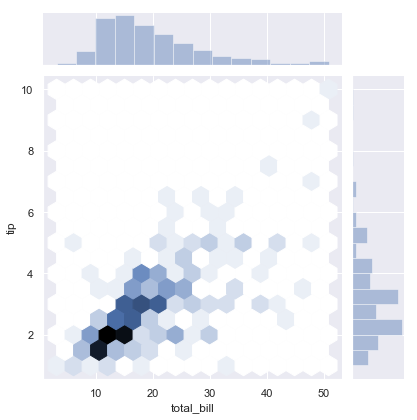

In [24]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

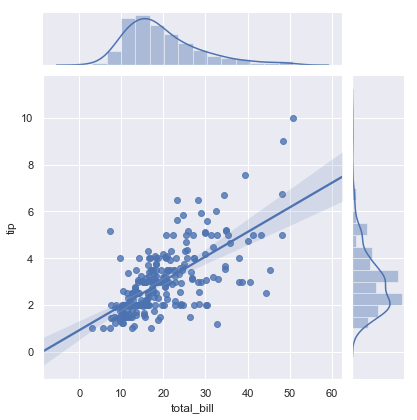

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

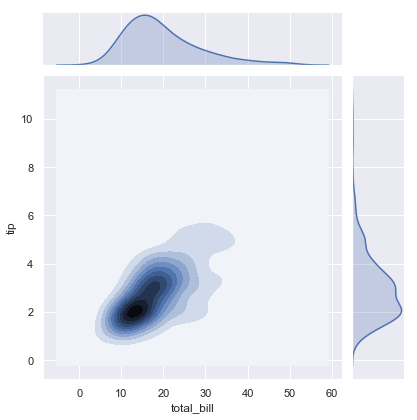

In [26]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

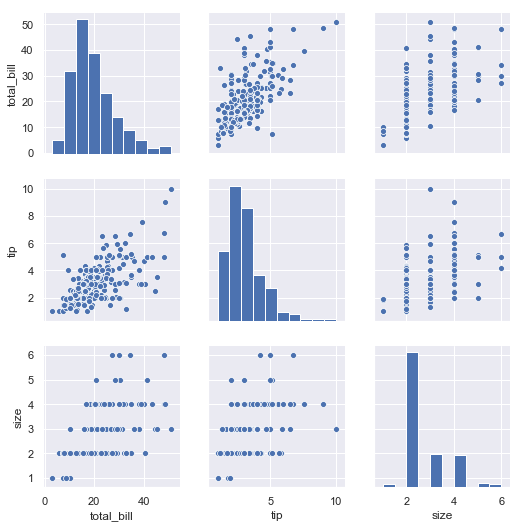

In [27]:
sns.pairplot(tips) # Shows JOINTPLOT of all combinations of the numerical data in the dataframe
# for combination of a column with itself, it'll plot its histogram

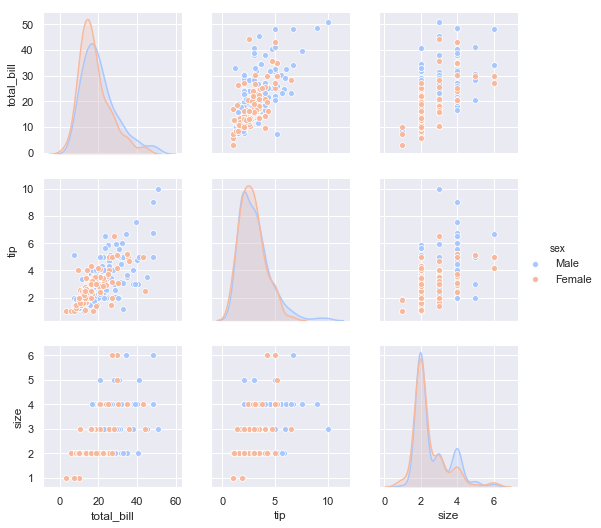

In [34]:
sns.pairplot(tips, hue='sex',palette='coolwarm') # Shows JOINTPLOT of all combinations of the numerical data in the dataframe
# for combination of a column with itself, it'll plot its histogram
# hue='sex' is for a categorical column # palette='coolwarm' chooses a colormap

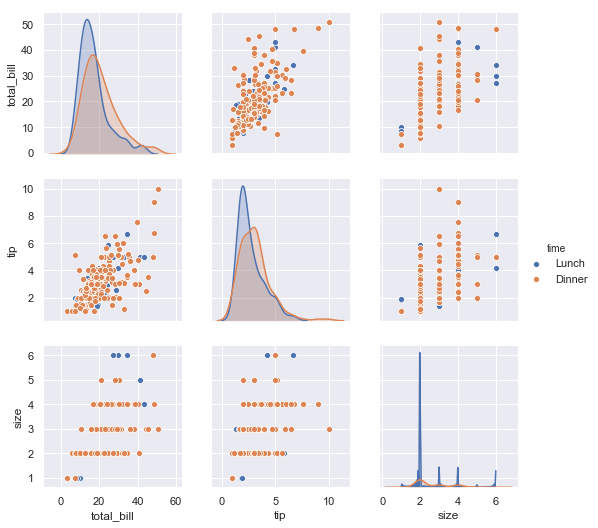

In [29]:
sns.pairplot(tips, hue='time')

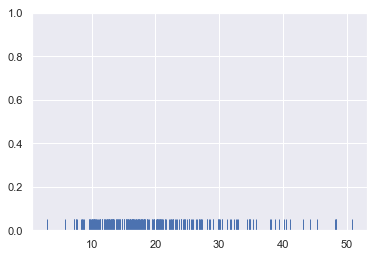

In [35]:
sns.rugplot(tips['total_bill'])

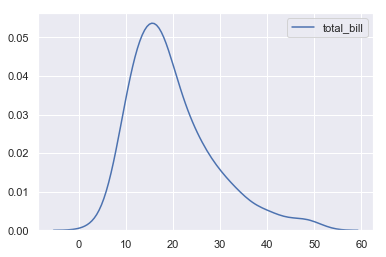

In [38]:
sns.kdeplot(tips['total_bill'])

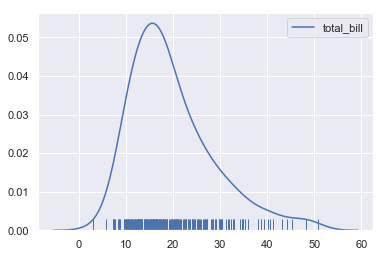

In [39]:
sns.rugplot(tips['total_bill'])
sns.kdeplot(tips['total_bill'])

(0, 1)

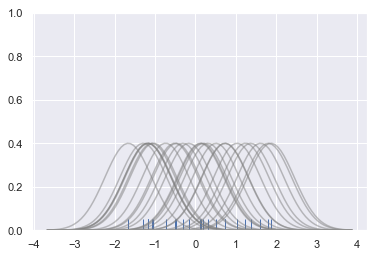

In [36]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

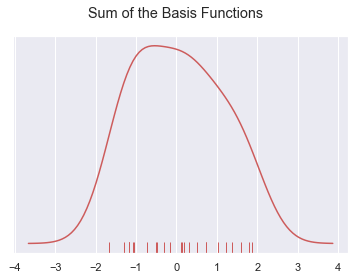

In [37]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

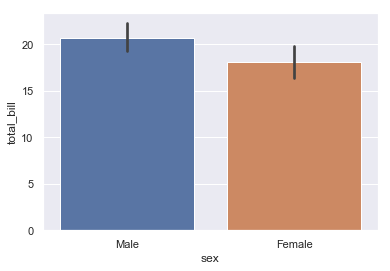

In [40]:
sns.barplot(x='sex',y='total_bill',data=tips) # Plots mean (by default) of a numerical data in different categories

In [41]:
import numpy as np

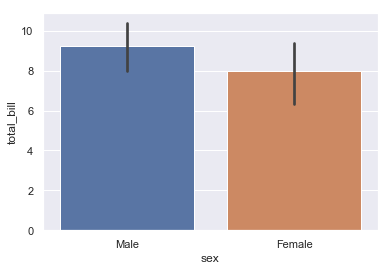

In [42]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

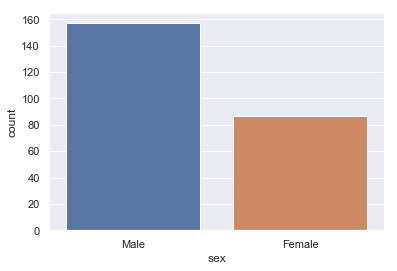

In [48]:
sns.countplot(x='sex',data=tips) # Plots the count of elements in each category

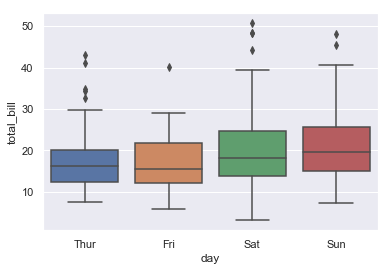

In [49]:
sns.boxplot(x='day',y='total_bill',data=tips)

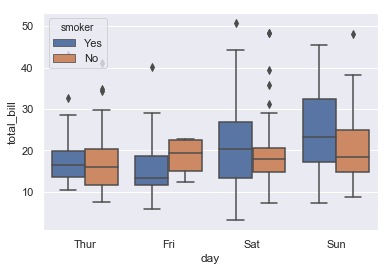

In [53]:
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')

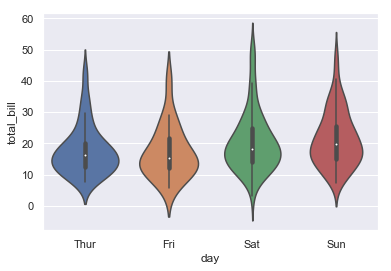

In [54]:
sns.violinplot(x='day',y='total_bill',data=tips) # Boxplot plus distribution of data points on the sides

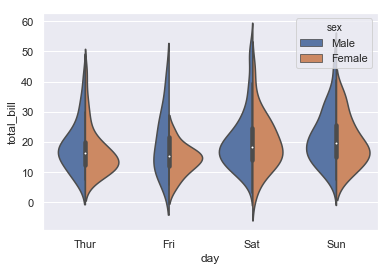

In [55]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True) # Boxplot plus distribution of data points on the sides

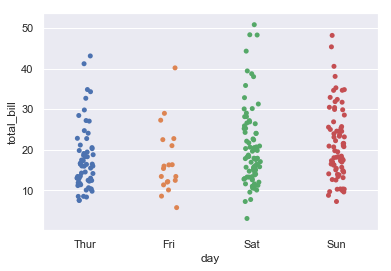

In [57]:
sns.stripplot(x='day',y='total_bill',data=tips) # ,jitter=True adds some random noise to seprate the staked-on-eachother data

C:\Users\uranu\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


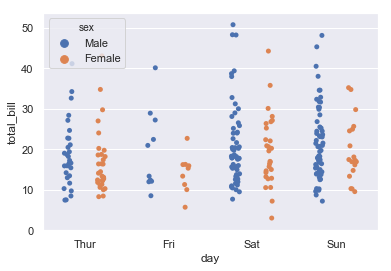

In [58]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True) # plots the data distribution as dots

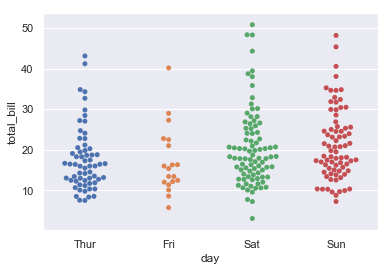

In [59]:
sns.swarmplot(x='day',y='total_bill',data=tips) # Combining stripplot and violinplot

C:\Users\uranu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


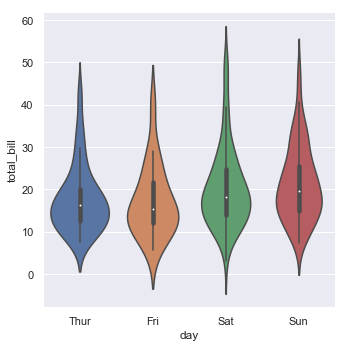

In [62]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

In [12]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [65]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [66]:
tc = tips.corr()

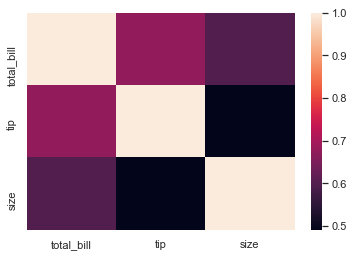

In [67]:
sns.heatmap(tc)

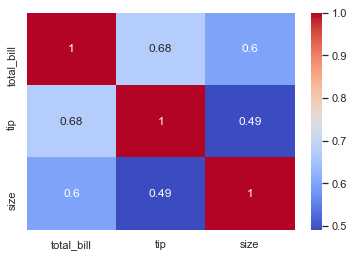

In [69]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [70]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [72]:
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [73]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

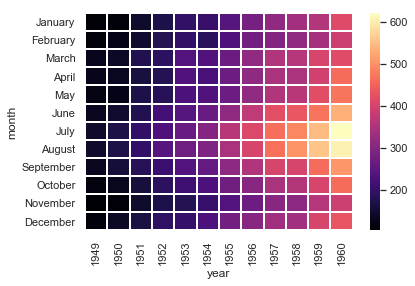

In [77]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=1)

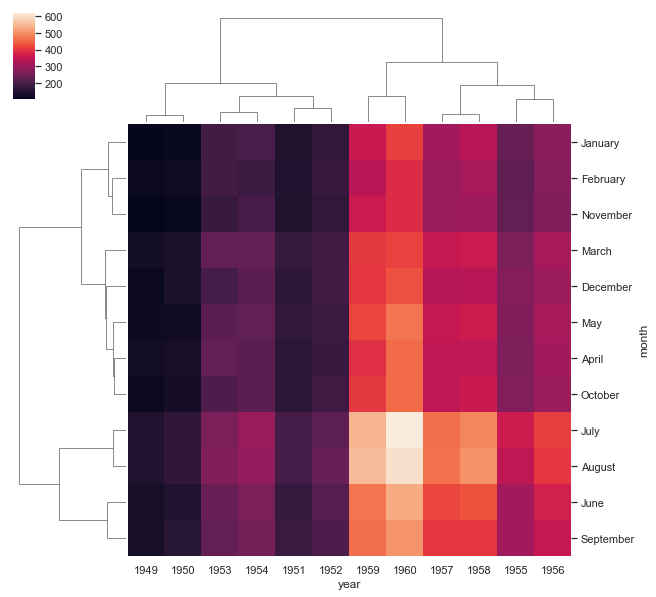

In [78]:
sns.clustermap(fp) # clusters so that the months and years that are more similar to each other are shown next to eachother

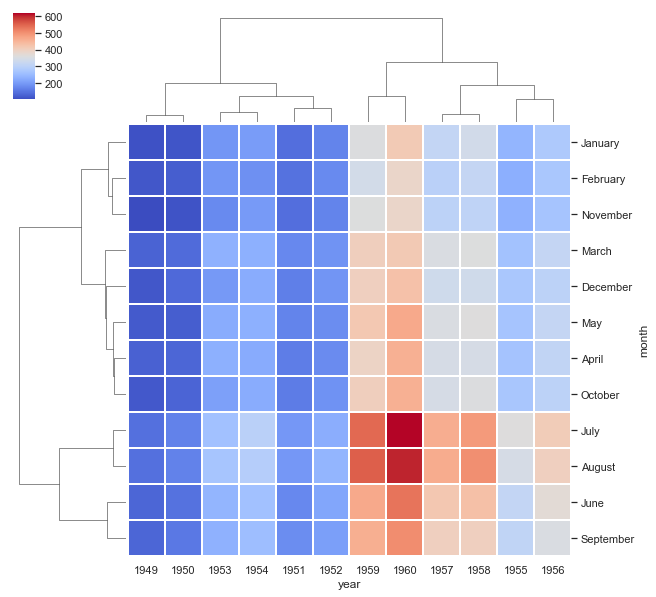

In [80]:
sns.clustermap(fp, cmap='coolwarm',linecolor='white',linewidth=1)

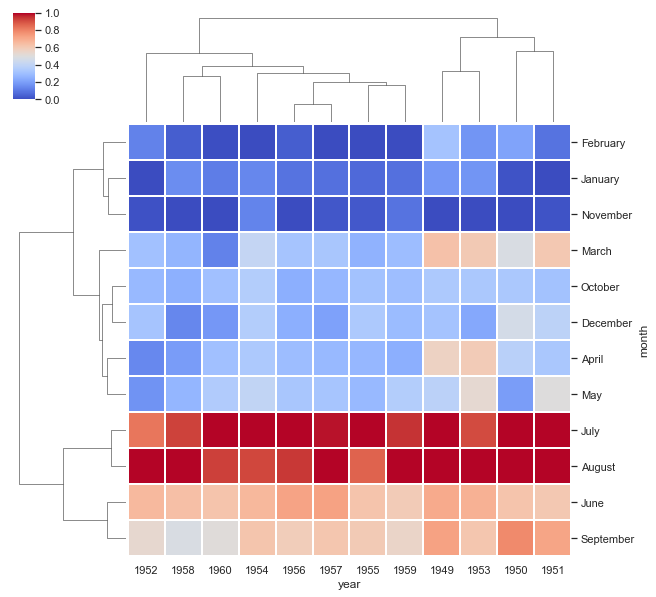

In [88]:
sns.clustermap(fp,cmap='coolwarm',linecolor='white',linewidth=1, standard_scale=1)

In [90]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


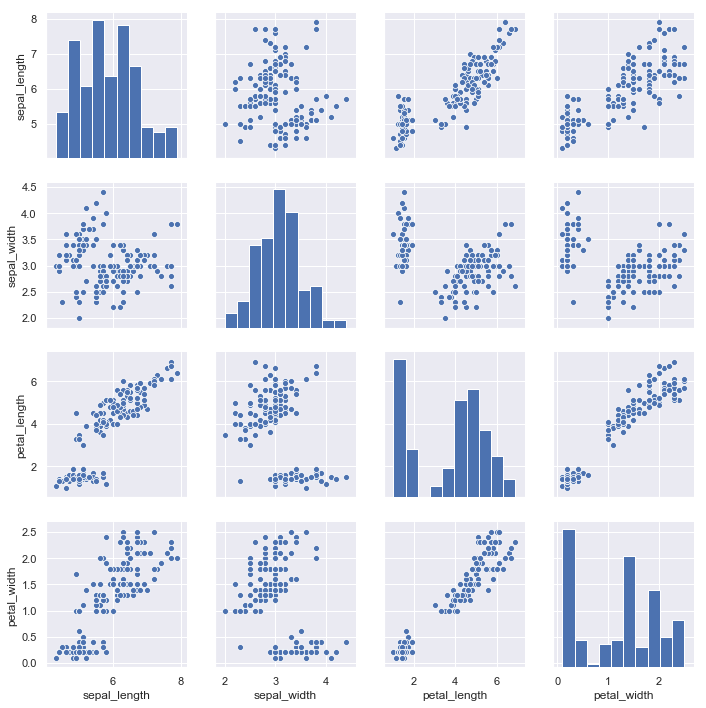

In [92]:
sns.pairplot(iris)

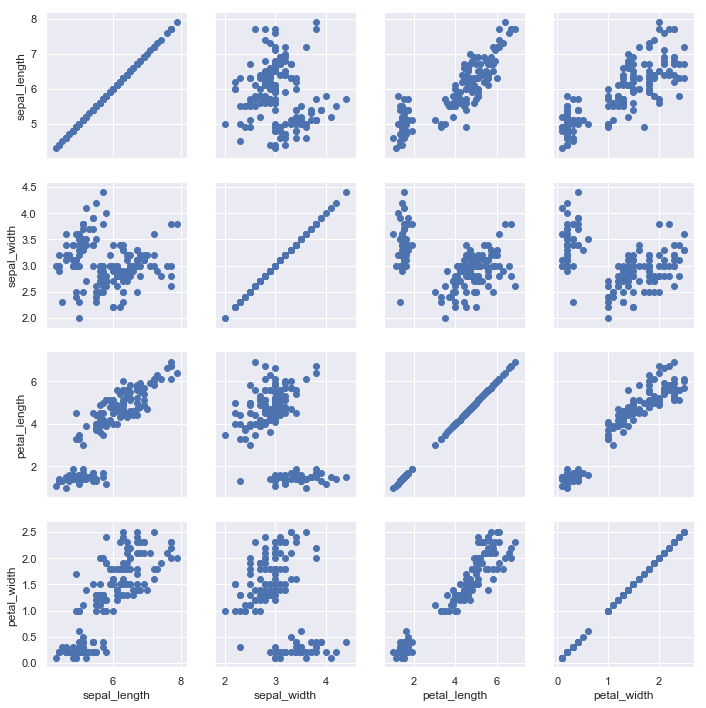

In [104]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

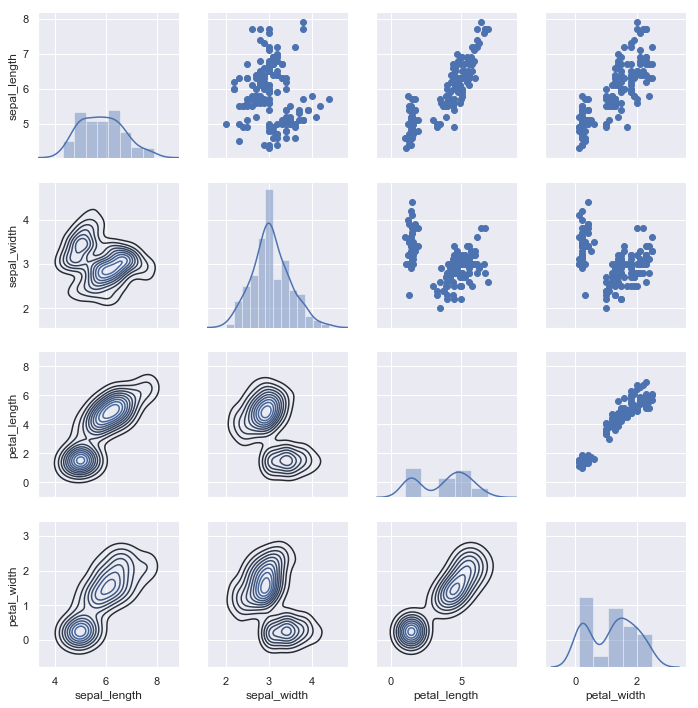

In [102]:
g = sns.PairGrid(iris) # creates an empty pairplot
g.map_diag(sns.distplot) # maps distribution plots on diagonal pairs
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

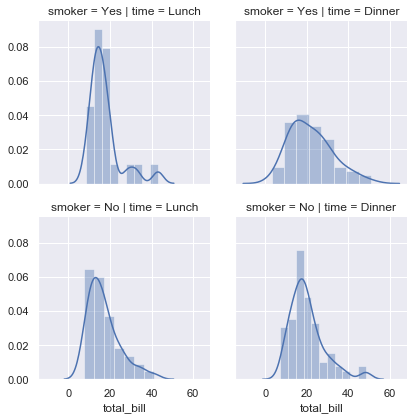

In [100]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

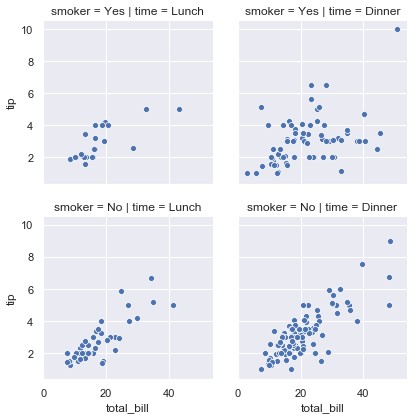

In [108]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.scatterplot,'total_bill','tip')

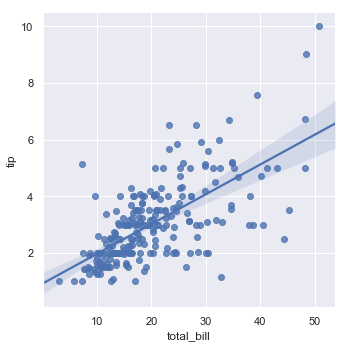

In [14]:
sns.lmplot(x='total_bill',y='tip',data=tips) # a linear regression model

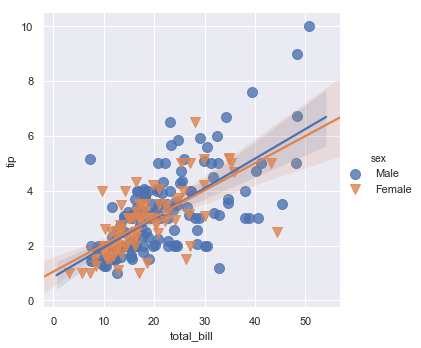

In [19]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100}) # scatter_kws passes in a set of matplotlib customizations

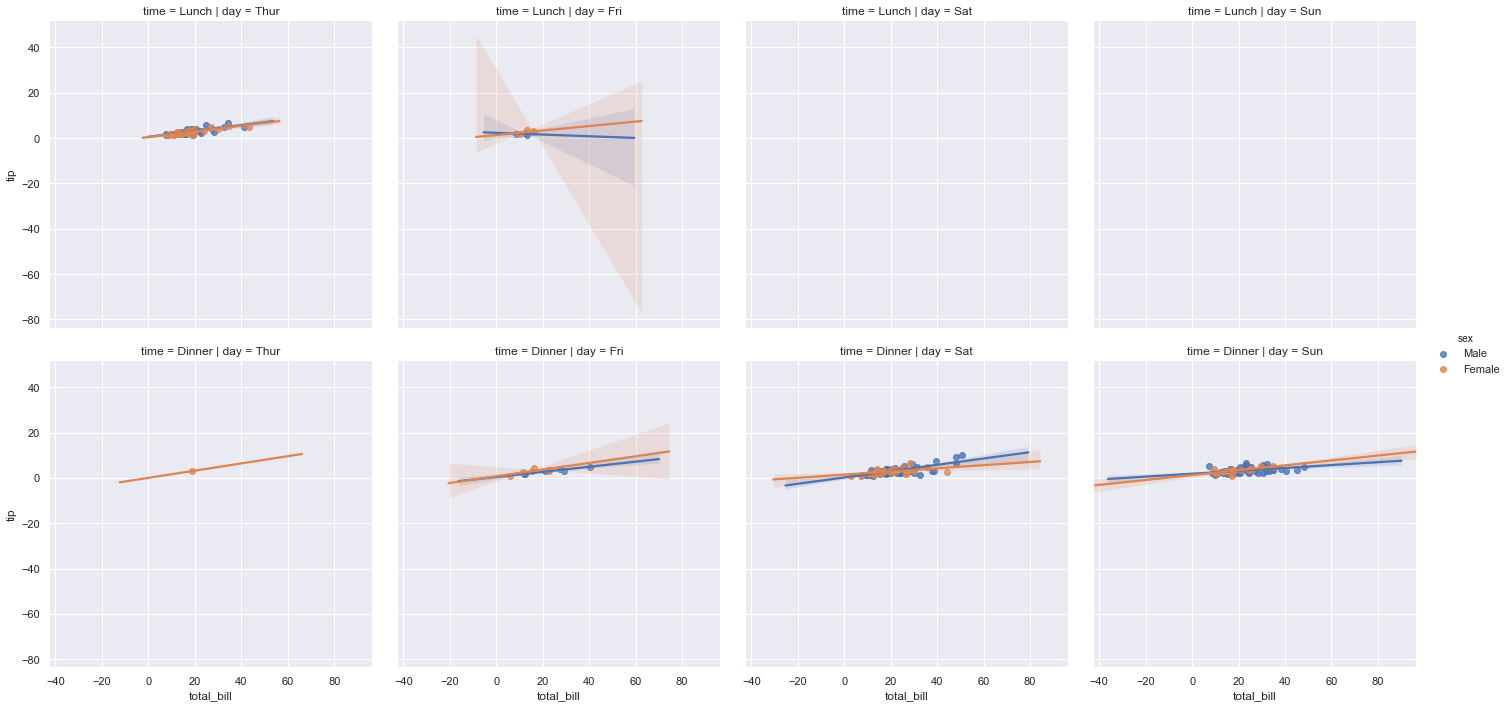

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')

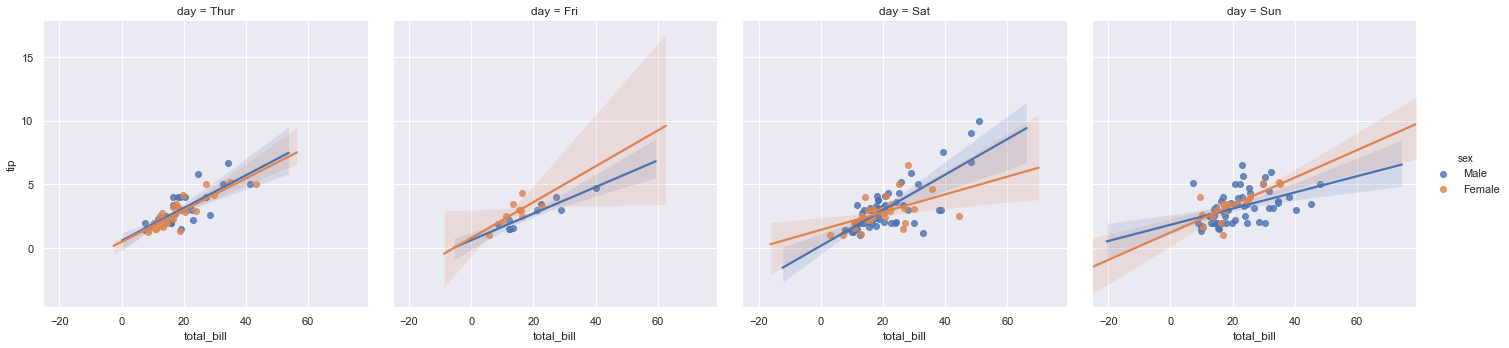

In [23]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')

C:\Users\uranu\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


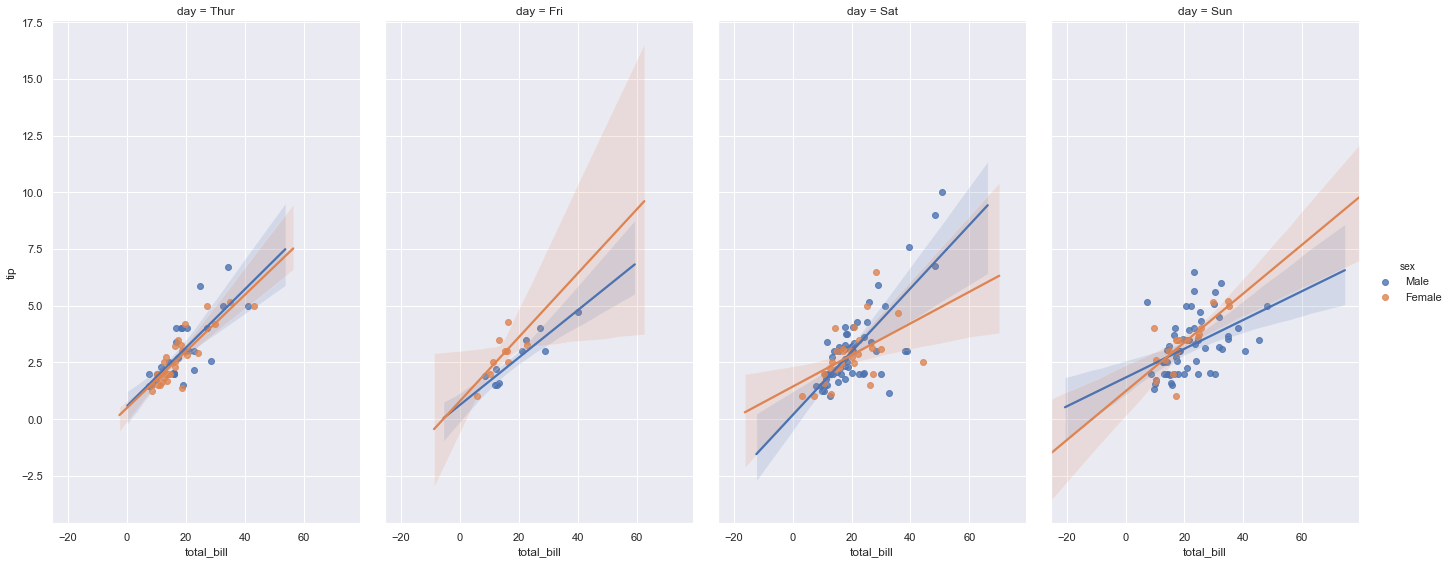

In [25]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,size=8) # aspect is the aspect ration of width and height (width/height)

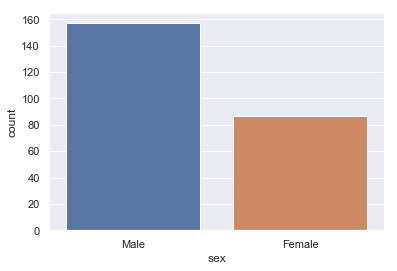

In [30]:
sns.countplot(x='sex',data=tips)

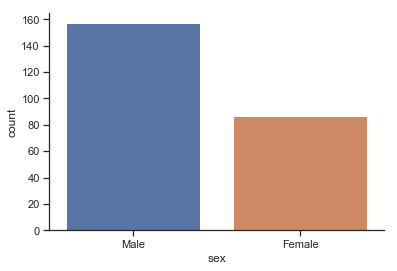

In [33]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine() # removes the ticks on top and right

In [36]:
import matplotlib.pyplot as plt

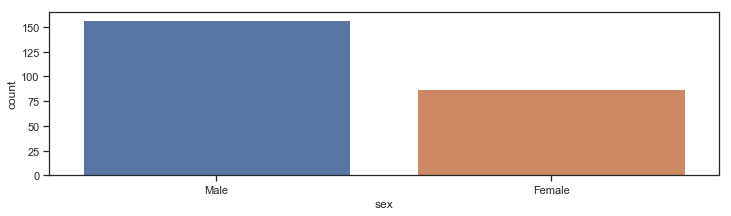

In [37]:
plt.figure(figsize=(12,3)) # Seaborn is essentially always calling the matplotlib, so it's feature can be used with it
sns.countplot(x='sex',data=tips)

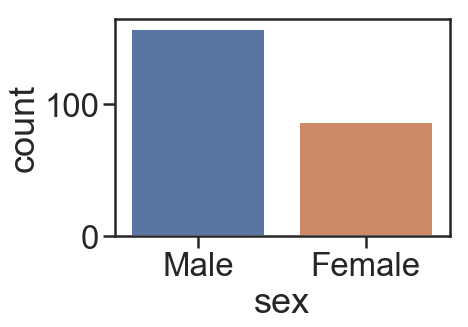

In [41]:
sns.set_context('poster',font_scale=1.5)
sns.countplot(x='sex',data=tips)

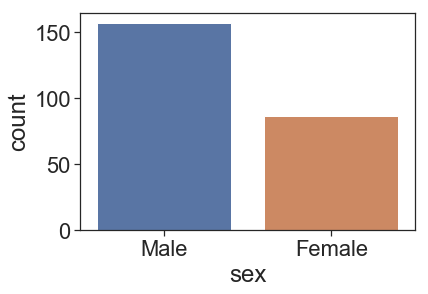

In [44]:
sns.set_context('notebook',font_scale=2)
sns.countplot(x='sex',data=tips)